In [1]:
import pandas as pd
import numpy as np

In [2]:
archivo = ('reto_agua.csv')
df = pd.read_csv(archivo)


In [3]:
df.shape

(55083, 26)

In [4]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,construction_year,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,1999,gravity,user-group,annually,soft,good,enough,groundwater,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,2010,gravity,user-group,never pay,soft,good,insufficient,surface,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,2009,gravity,user-group,per bucket,soft,good,enough,surface,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,1986,submersible,user-group,never pay,soft,good,dry,groundwater,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,0,gravity,other,never pay,soft,good,seasonal,surface,communal standpipe,functional


In [5]:
df.tail()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,construction_year,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
55078,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,1999,gravity,user-group,per bucket,soft,good,enough,groundwater,communal standpipe,functional
55079,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,1996,gravity,user-group,annually,soft,good,enough,surface,communal standpipe,functional
55080,37057,0.0,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,0,swn 80,user-group,monthly,fluoride,fluoride,enough,groundwater,hand pump,functional
55081,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,...,0,nira/tanira,user-group,never pay,soft,good,insufficient,groundwater,hand pump,functional
55082,26348,0.0,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,...,2002,nira/tanira,user-group,on failure,salty,salty,enough,groundwater,hand pump,functional


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55083 entries, 0 to 55082
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     55083 non-null  int64  
 1   amount_tsh             55083 non-null  float64
 2   funder                 51883 non-null  object 
 3   gps_height             55083 non-null  int64  
 4   installer              51868 non-null  object 
 5   longitude              55083 non-null  float64
 6   latitude               55083 non-null  float64
 7   wpt_name               55081 non-null  object 
 8   num_private            55083 non-null  int64  
 9   basin                  55083 non-null  object 
 10  region                 55083 non-null  object 
 11  population             55083 non-null  int64  
 12  public_meeting         51905 non-null  object 
 13  recorded_by            55083 non-null  object 
 14  scheme_management      51428 non-null  object 
 15  pe

In [7]:
df.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
count,55083.000000,55083.000000,55083.000000,55083.000000,5.508300e+04,55083.000000,55083.000000,55083.000000
mean,37112.300020,321.614379,671.486230,34.299640,-5.748624e+00,0.487192,180.286785,1311.016920
std,21462.114645,3065.794824,696.404821,6.142341,2.929462e+00,12.637230,474.365391,948.342454
min,0.000000,0.000000,-90.000000,0.000000,-1.158630e+01,0.000000,0.000000,0.000000
25%,18502.000000,0.000000,0.000000,33.176482,-8.566286e+00,0.000000,0.000000,0.000000
50%,37051.000000,0.000000,368.000000,34.963928,-5.100971e+00,0.000000,25.000000,1986.000000
75%,55651.500000,20.000000,1325.000000,37.206957,-3.332487e+00,0.000000,210.000000,2004.000000
max,74247.000000,350000.000000,2628.000000,40.345193,-2.000000e-08,1776.000000,30500.000000,2013.000000


In [8]:
df.funder.value_counts().sum()            

51883

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id                          0
amount_tsh                  0
funder                   3200
gps_height                  0
installer                3215
longitude                   0
latitude                    0
wpt_name                    2
num_private                 0
basin                       0
region                      0
population                  0
public_meeting           3178
recorded_by                 0
scheme_management        3655
permit                   2756
construction_year           0
extraction_type             0
management_group            0
payment_type                0
water_quality               0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

In [11]:
df = df.drop(columns='id')

In [12]:
df.duplicated().sum()

166

In [13]:
df.wpt_name.value_counts()

wpt_name
none               3487
Shuleni            1605
Zahanati            752
Msikitini           491
Kanisani            302
                   ... 
Kwa Kavasha           1
Maendeleo D           1
Mlali                 1
Kwa Neneje            1
Kwa Mzee Lugawa       1
Name: count, Length: 35004, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55083 entries, 0 to 55082
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             55083 non-null  float64
 1   funder                 51883 non-null  object 
 2   gps_height             55083 non-null  int64  
 3   installer              51868 non-null  object 
 4   longitude              55083 non-null  float64
 5   latitude               55083 non-null  float64
 6   wpt_name               55081 non-null  object 
 7   num_private            55083 non-null  int64  
 8   basin                  55083 non-null  object 
 9   region                 55083 non-null  object 
 10  population             55083 non-null  int64  
 11  public_meeting         51905 non-null  object 
 12  recorded_by            55083 non-null  object 
 13  scheme_management      51428 non-null  object 
 14  permit                 52327 non-null  object 
 15  co

In [15]:
df = df.replace({'none': np.nan, None: np.nan})

In [16]:
df = df.replace({'None': np.nan, None: np.nan})

In [17]:
min = ['funder', 'installer', 'wpt_name', 'basin', 'region', 'public_meeting', 'recorded_by',
'scheme_management', 'permit', 'extraction_type', 'management_group', 'payment_type', 'water_quality',
'quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group', 'status_group']

def minusculas(df, columnas):
    for i in columnas:
        df[i] = df[i].apply(lambda x: x.lower() if isinstance(x, str) else x)
    return df

print("Valores NaN antes de aplicar la función:")
print(df.isna().sum())
df = minusculas(df, min)


Valores NaN antes de aplicar la función:
amount_tsh                  0
funder                   3200
gps_height                  0
installer                3215
longitude                   0
latitude                    0
wpt_name                 3489
num_private                 0
basin                       0
region                      0
population                  0
public_meeting           3178
recorded_by                 0
scheme_management        3655
permit                   2756
construction_year           0
extraction_type             0
management_group            0
payment_type                0
water_quality               0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64


In [18]:
df.duplicated().sum()

166

In [19]:
df.isnull().sum()

amount_tsh                  0
funder                   3200
gps_height                  0
installer                3215
longitude                   0
latitude                    0
wpt_name                 3489
num_private                 0
basin                       0
region                      0
population                  0
public_meeting           3178
recorded_by                 0
scheme_management        3655
permit                   2756
construction_year           0
extraction_type             0
management_group            0
payment_type                0
water_quality               0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55083 entries, 0 to 55082
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             55083 non-null  float64
 1   funder                 51883 non-null  object 
 2   gps_height             55083 non-null  int64  
 3   installer              51868 non-null  object 
 4   longitude              55083 non-null  float64
 5   latitude               55083 non-null  float64
 6   wpt_name               51594 non-null  object 
 7   num_private            55083 non-null  int64  
 8   basin                  55083 non-null  object 
 9   region                 55083 non-null  object 
 10  population             55083 non-null  int64  
 11  public_meeting         51905 non-null  object 
 12  recorded_by            55083 non-null  object 
 13  scheme_management      51428 non-null  object 
 14  permit                 52327 non-null  object 
 15  co

In [21]:
df = df.drop_duplicates()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54917 entries, 0 to 55082
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             54917 non-null  float64
 1   funder                 51717 non-null  object 
 2   gps_height             54917 non-null  int64  
 3   installer              51702 non-null  object 
 4   longitude              54917 non-null  float64
 5   latitude               54917 non-null  float64
 6   wpt_name               51443 non-null  object 
 7   num_private            54917 non-null  int64  
 8   basin                  54917 non-null  object 
 9   region                 54917 non-null  object 
 10  population             54917 non-null  int64  
 11  public_meeting         51783 non-null  object 
 12  recorded_by            54917 non-null  object 
 13  scheme_management      51266 non-null  object 
 14  permit                 52161 non-null  object 
 15  constru

In [23]:
df.isnull().sum()

amount_tsh                  0
funder                   3200
gps_height                  0
installer                3215
longitude                   0
latitude                    0
wpt_name                 3474
num_private                 0
basin                       0
region                      0
population                  0
public_meeting           3134
recorded_by                 0
scheme_management        3651
permit                   2756
construction_year           0
extraction_type             0
management_group            0
payment_type                0
water_quality               0
quality_group               0
quantity_group              0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

## Analisis de columnas

In [24]:
def analyze_column(df, column_name):
  
    col_data = df[column_name]
    result = {}
    result['column_name'] = column_name
    result['dtype'] = col_data.dtype
    result['missing_values'] = col_data.isnull().sum()
    result['missing_percentage'] = (col_data.isnull().sum() / len(col_data)) * 100
    
    if pd.api.types.is_numeric_dtype(col_data):
        result['description'] = col_data.describe()
    elif pd.api.types.is_bool_dtype(col_data):
        result['value_counts'] = col_data.value_counts()
    elif pd.api.types.is_string_dtype(col_data):
        result['description'] = col_data.describe()
        result['value_counts'] = col_data.value_counts()
    else:
        result['description'] = col_data.describe(include='all')
        result['value_counts'] = col_data.value_counts()
    
    return result


def print_analysis(analysis):
    
    print(f"\nAnálisis para la columna: {analysis['column_name']}")
    print(f"Tipo de dato: {analysis['dtype']}")
    print(f"Valores nulos: {analysis['missing_values']} ({analysis['missing_percentage']:.2f}%)")
    
    if 'description' in analysis:
        print("\nEstadísticas descriptivas:")
        print(analysis['description'])
    
    if 'outliers' in analysis:
        print(f"\nValores atípicos (outliers): {analysis['outliers']}")
        if analysis['outliers'] > 0:
            print(analysis['outliers_data'])
    
    if 'value_counts' in analysis:
        print("\nFrecuencia de valores:")
        print(analysis['value_counts'])

Mauro

In [25]:
columns_to_analyze = ['population','public_meeting','recorded_by', 'scheme_management', 'permit']

In [26]:
# Bucle para analizar cada columna en la lista y almacenar resultados
analyses = []
for column in columns_to_analyze:
    analysis = analyze_column(df, column)
    analyses.append(analysis)

for analysis in analyses:
    print_analysis(analysis)


Análisis para la columna: population
Tipo de dato: int64
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count    54917.000000
mean       180.802411
std        474.981278
min          0.000000
25%          0.000000
50%         26.000000
75%        211.000000
max      30500.000000
Name: population, dtype: float64

Análisis para la columna: public_meeting
Tipo de dato: object
Valores nulos: 3134 (5.71%)

Estadísticas descriptivas:
count     51783
unique        2
top        True
freq      47171
Name: public_meeting, dtype: object

Frecuencia de valores:
public_meeting
True     47171
False     4612
Name: count, dtype: int64

Análisis para la columna: recorded_by
Tipo de dato: object
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count                       54917
unique                          1
top       geodata consultants ltd
freq                        54917
Name: recorded_by, dtype: object

Frecuencia de valores:
recorded_by
geodata consultants ltd    54917
Name: count, dt

In [27]:
#### Columna 'population'
# Se Mantiene la columna sin cambios.
# Es importante entender por qué hay tantos valores de población cero.
# Podría ser útil investigar si estos pozos están en áreas completamente deshabitadas 
# o si se trata de áreas rurales muy dispersas.

In [28]:
#### Columna 'public_meeting' Faltan 5.77%
# Reemplazar los valores faltantes con True pq True es top frecuencia con 47292 y categorizar
df['public_meeting'] = df['public_meeting'].fillna(True)
df['public_meeting'] = df['public_meeting'].astype(int)
df['public_meeting'] = df['public_meeting'].astype('int8')

C:\Users\Ariel\AppData\Local\Temp\ipykernel_17628\3713502145.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['public_meeting'] = df['public_meeting'].fillna(True)


In [29]:
#### Columna 'recorded_by' 1 registro cargo todos los datoa es irrelevante drop
# Eliminar la columna 'recorded_by'
df = df.drop(columns='recorded_by')

In [30]:
#### Columna 'scheme_management' faltan 6.64% de los datos 
#Imputar valores faltantes con la categoría más frecuente (VWC) 34459 y luego categorizar
df['scheme_management'] = df['scheme_management'].fillna('VWC')
categories = df['scheme_management'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
df['scheme_management'] = df['scheme_management'].apply(lambda x: category_map[x])
df['scheme_management'] = df['scheme_management'].astype('int64')

In [31]:
#### Columna 'permit' 
# Reemplazar los valores faltantes (5%) con True pq True es top frecuencia con 47292
df['permit'] = df['permit'].fillna(True) 
df['permit'] = df['permit'].astype(int) # Convertir a binario: True -> 1, False -> 0
df['permit'] = df['permit'].astype('int8')


C:\Users\Ariel\AppData\Local\Temp\ipykernel_17628\4254726572.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['permit'] = df['permit'].fillna(True)


### Ariel

In [32]:
columns_to_analyze = ['quality_group', 'quantity_group', 'source_class', 'waterpoint_type_group','status_group']

In [33]:
analyses = []
for column in columns_to_analyze:
    analysis = analyze_column(df, column)
    analyses.append(analysis)

for analysis in analyses:
    print_analysis(analysis)


Análisis para la columna: quality_group
Tipo de dato: object
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count     54917
unique        6
top        good
freq      46778
Name: quality_group, dtype: object

Frecuencia de valores:
quality_group
good        46778
salty        4893
unknown      1816
milky         790
colored       436
fluoride      204
Name: count, dtype: int64

Análisis para la columna: quantity_group
Tipo de dato: object
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count      54917
unique         5
top       enough
freq       30720
Name: quantity_group, dtype: object

Frecuencia de valores:
quantity_group
enough          30720
insufficient    13608
dry              6181
seasonal         3633
unknown           775
Name: count, dtype: int64

Análisis para la columna: source_class
Tipo de dato: object
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count           54917
unique              3
top       groundwater
freq            42925
Name: source_clas

In [34]:
#### Columna 'quality_group'
# Renombrar la columna 'quality_group' a 'water_quality_2'y luego categorizar
df.rename(columns={'quality_group': 'water_quality_2'}, inplace=True)
categories = df['water_quality_2'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
df['water_quality_2'] = df['water_quality_2'].apply(lambda x: category_map[x])
df['water_quality_2'] = df['water_quality_2'].astype('int64')

In [35]:
#### Columna 'quantity_group' se categoriza
categories = df['quantity_group'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
df['quantity_group'] = df['quantity_group'].apply(lambda x: category_map[x])
df['quantity_group'] = df['quantity_group'].astype('int64')

In [36]:
#### Columna 'source_class'
categories = df['source_class'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
df['source_class'] = df['source_class'].apply(lambda x: category_map[x])
df['source_class'] = df['source_class'].astype('int64')

In [37]:
#### Columna 'waterpoint_type_group'
categories = df['waterpoint_type_group'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
df['waterpoint_type_group'] = df['waterpoint_type_group'].apply(lambda x: category_map[x])
df['waterpoint_type_group'] = df['waterpoint_type_group'].astype('int64')

In [38]:
#### Columna 'status_group'
categories = df['status_group'].unique()
category_map = {category: idx for idx, category in enumerate(categories)}
df['status_group'] = df['status_group'].apply(lambda x: category_map[x])
df['status_group'] = df['status_group'].astype('int64')

In [39]:
df_10colum = df.copy()

#### Limpieza de las diez columnas 

##### Ariel: 

In [40]:
columns_to_analyze = ['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude']

In [41]:
analyses = []
for column in columns_to_analyze:
    analysis = analyze_column(df, column)
    analyses.append(analysis)

for analysis in analyses:
    print_analysis(analysis)


Análisis para la columna: amount_tsh
Tipo de dato: float64
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count     54917.000000
mean        322.568328
std        3070.372845
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

Análisis para la columna: funder
Tipo de dato: object
Valores nulos: 3200 (5.83%)

Estadísticas descriptivas:
count                      51717
unique                      1853
top       government of tanzania
freq                        8346
Name: funder, dtype: object

Frecuencia de valores:
funder
government of tanzania    8346
danida                    2955
hesawa                    1928
rwssp                     1258
world bank                1252
                          ... 
ngelepo group                1
mwanza                       1
madaraweshi                  1
jafary mbaga                 1
samlo                        1
Name: count, Length: 1853, 

In [42]:
df['amount_tsh'] = df['amount_tsh'].astype('int64')

In [43]:
df = df.dropna(subset=['funder'])

funder_map = {
    'government of tanzania': 1,
    'danida': 2,
    'hesawa': 3,
    'rwssp': 4,
    'world bank': 5
}
df['funder'] = df['funder'].apply(lambda x: funder_map.get(x, 6))

In [44]:
#gps_height no la toco, esta ok. reviso -90 y no es un outliers
df.gps_height.sort_values(ascending=False)

37814    2628
11962    2627
19838    2626
32873    2626
419      2623
         ... 
38140     -57
13248     -59
14093     -63
46603     -63
54654     -90
Name: gps_height, Length: 51717, dtype: int64

In [45]:
df.installer.value_counts()

installer
dwe                 15683
government           1612
hesawa               1336
rwe                  1048
commu                1033
                    ...  
kalitesi                1
water user group        1
harison                 1
msigwa                  1
selepta                 1
Name: count, Length: 1883, dtype: int64

In [46]:
#installer tiene Valores nulos: 3215 (5.84%)
df = df.dropna(subset=['installer'])

funder_map = {
    'dwe': 1,
    'government': 2,
    'hesawa': 3,
    'rwe': 4,
    'commu': 5
}
df['installer'] = df['installer'].apply(lambda x: funder_map.get(x, 6))

In [47]:
# Filtrar los registros anómalos de coordenadas en total
anomalous_records = (df['longitude'] == 0) & (np.abs(df['latitude']) < 1e-6)
df = df[~anomalous_records]

#### Erick

In [48]:
columns_to_analyze = ['latitude','wpt_name', 'num_private', 'basin', 'region']


In [49]:
analyses = []
for column in columns_to_analyze:
    analysis = analyze_column(df, column)
    analyses.append(analysis)

for analysis in analyses:
    print_analysis(analysis)


Análisis para la columna: latitude
Tipo de dato: float64
Valores nulos: 0 (0.00%)

Estadísticas descriptivas:
count    50383.000000
mean        -5.838548
std          2.819253
min        -11.586297
25%         -8.449651
50%         -5.175600
75%         -3.348788
max         -0.998464
Name: latitude, dtype: float64

Análisis para la columna: wpt_name
Tipo de dato: object
Valores nulos: 3414 (6.78%)

Estadísticas descriptivas:
count       46969
unique      32623
top       shuleni
freq         1549
Name: wpt_name, dtype: object

Frecuencia de valores:
wpt_name
shuleni                        1549
zahanati                        662
msikitini                       459
kanisani                        271
ofisini                         218
                               ... 
kibaha independent school 1       1
kwa bubu                          1
kwa sakaira                       1
mendi shuleni                     1
kwa mzee lugawa                   1
Name: count, Length: 32623, dtype: int

In [50]:
df.wpt_name.value_counts()

wpt_name
shuleni                        1549
zahanati                        662
msikitini                       459
kanisani                        271
ofisini                         218
                               ... 
kibaha independent school 1       1
kwa bubu                          1
kwa sakaira                       1
mendi shuleni                     1
kwa mzee lugawa                   1
Name: count, Length: 32623, dtype: int64

In [51]:
#wpt_name
df = df.dropna(subset=['wpt_name'])

funder_map = {
    'shuleni': 1,
    'zahanati': 2,
    'msikitini': 3,
    'kanisani': 4,
    'ofisini': 5
}
df['wpt_name'] = df['wpt_name'].apply(lambda x: funder_map.get(x, 6))

In [52]:
df.wpt_name.value_counts()

wpt_name
6    43810
1     1549
2      662
3      459
4      271
5      218
Name: count, dtype: int64

In [53]:
df = df.drop(columns='num_private')

In [54]:
#region categorizar
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])

In [55]:
#BASIN categorizar
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['basin'] = label_encoder.fit_transform(df['basin'])

#### Gabriel

Falta gabriel 
'construction_year', 'extraction_type', management_group','payment_type', 'water_quality', 


In [56]:
#Modificación columnas object a int64

df['payment_type'] = df['payment_type'].apply(lambda x: 0 if x == 'unknown' 
                                                else (1 if x == 'other' else (2 if x == 'on failure' 
                                                    else (3 if x == 'never pay' else(4 if x == 'annually' else(5 if x == 'monthly' else 6))))))
df.payment_type.unique()

df['management_group'] = df['management_group'].apply(lambda x: 0 if x == 'unknown' 
                                                else (1 if x == 'other' else (2 if x == 'parastatal' 
                                                    else (3 if x == 'commercial' else 4))))
df.management_group.unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [57]:
df = df.drop(columns='water_quality')

In [58]:
df.construction_year.value_counts()
df.construction_year.unique()

array([2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 2000, 2002, 2004,
       2008, 2007, 1973, 1999, 1992, 1995, 1974, 2006, 1962, 2005, 1997,
       2012, 1972, 1970, 1996, 1977, 1983, 1982, 1985, 1988, 1975, 1960,
       1990, 1961, 1976, 1998, 1963, 1984, 1971, 1994, 2003, 1968, 2001,
       1980, 1979, 1993, 1967, 2013, 1989, 1969, 1981, 1964, 1966, 1965],
      dtype=int64)

#### calcular la mediana del año de construcción para los pozos operativos y no operativos por separado y rellenar los valores faltantes en consecuencia.

In [59]:
# Calcular la mediana del año de construcción para pozos funcionales y no funcionales
median_functional = df[df['status_group'] == 1]['construction_year'].replace(0, pd.NA).median()
median_non_functional = df[df['status_group'] == 0]['construction_year'].replace(0, pd.NA).median()

def fill_missing_year(row):
    if row['construction_year'] == 0:
        if row['status_group'] == 1:
            return median_functional
        else:
            return median_non_functional
    return row['construction_year']

df['construction_year'] = df.apply(fill_missing_year, axis=1)
df['construction_year'] = df['construction_year'].astype(int)

In [60]:
#Extraction_type categorizar
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['extraction_type'] = label_encoder.fit_transform(df['extraction_type'])

In [61]:
df.to_csv('Reto_agua_final.csv', index=False)

In [62]:
df.shape

(46969, 22)

#### Correlacion

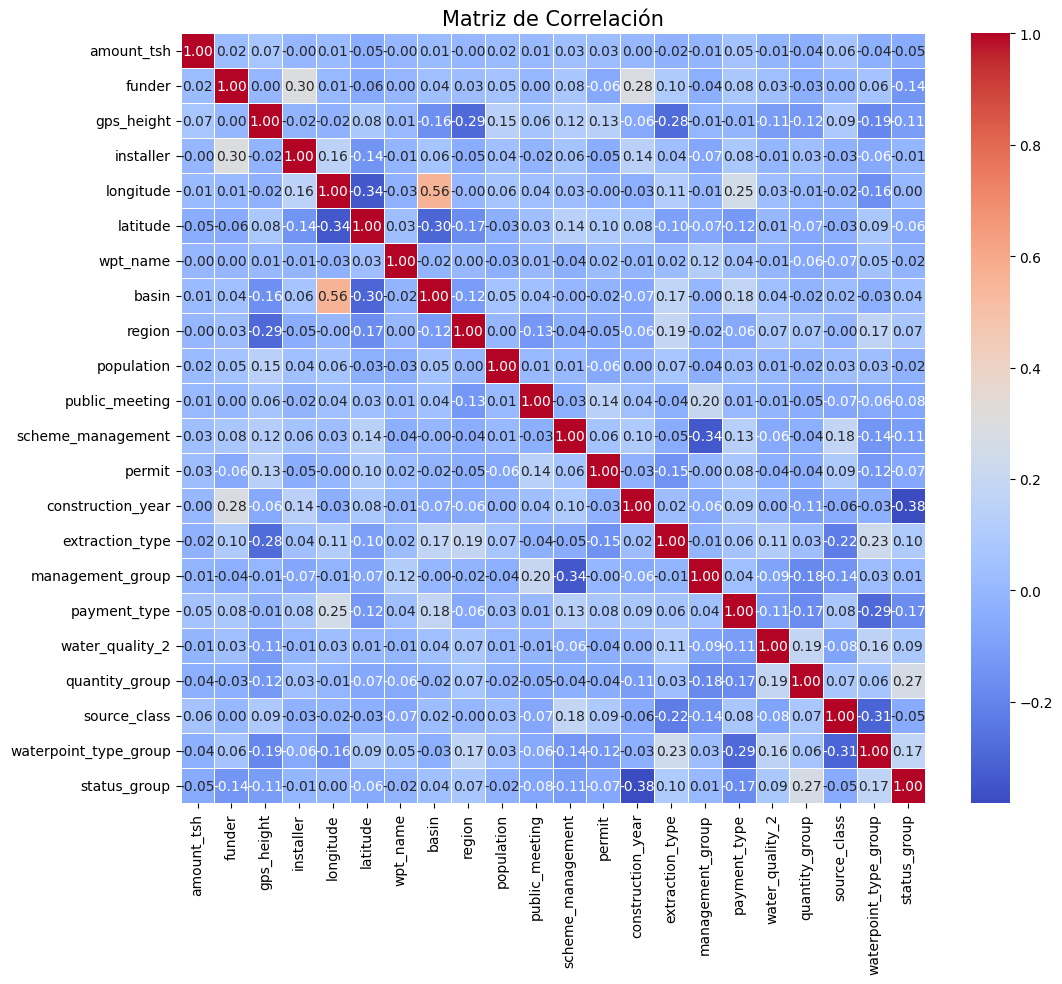

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'Reto_agua_final.csv'
df = pd.read_csv(file_path)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Configurar los títulos
plt.title('Matriz de Correlación', size=15)
plt.show()


#### 2.2. Ejercicio 2 

Ahora, vamos a entrenar el modelo: 

• Dividid los datos en variable independiente y target 
• Dividid el modelo en un conjunto de datos para el test (20%) y otro para el train (80%) 
y random_state=42 
• Entrenad varios modelos con los datos de train, validadlo con el test y seleccionad 
el que mejor resultado obtiene. 
Una vez hecho esto, responded a las siguientes preguntas: 



• ¿Qué score da el de entrenamiento y con el test? 

• ¿Creéis que puede tener sobreajuste (overfitting) o infraajuste (underfitting)?

#### Respuesta posible luego de evaluar los modelo:

Logistic Regression
Observación: Las precisiones en el conjunto de entrenamiento y prueba son iguales (0.75).
Conclusión: Este modelo no muestra signos de sobreajuste ni infraajuste, pero su desempeño es relativamente bajo, lo que sugiere que podría no ser el mejor modelo para estos datos.

K-Nearest Neighbors (KNN)
Observación: La precisión en el conjunto de entrenamiento (0.87) es mayor que en el conjunto de prueba (0.80).
Conclusión: Hay una ligera diferencia, lo que indica un posible sobreajuste, aunque no es extremo. El modelo generaliza relativamente bien.

Random Forest
Observación: La precisión en el conjunto de entrenamiento es perfecta (1.00) mientras que en el conjunto de prueba es alta (0.91).
Conclusión: Este modelo muestra claros signos de sobreajuste, ya que tiene una precisión perfecta en el conjunto de entrenamiento. Sin embargo, aún generaliza bien en el conjunto de prueba.

XGBoost
Observación: La precisión en el conjunto de entrenamiento (0.93) es ligeramente mayor que en el conjunto de prueba (0.90).
Conclusión: Hay un pequeño margen de diferencia, lo que sugiere un buen equilibrio entre ajuste y generalización. Este modelo no muestra signos significativos de sobreajuste ni infraajuste.

Resumen

Logistic Regression: No muestra signos de sobreajuste ni infraajuste, pero tiene un desempeño moderado.

K-Nearest Neighbors: Ligero sobreajuste, pero generaliza bien.

Random Forest: Muestra signos claros de sobreajuste.

XGBoost: Buen equilibrio entre ajuste y generalización, siendo el mejor modelo en términos de precisión y ROC-AUC.

-------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------

#### Machine Learning

In [64]:
from sklearn.model_selection import train_test_split

# Suponiendo que la columna 'status_group' es la etiqueta a predecir
X = df.drop('status_group', axis=1)
y = df['status_group']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Cargar el archivo CSV
file_path = 'Reto_agua_final.csv'
df = pd.read_csv(file_path)


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),  # Aumentar el número de iteraciones
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}


results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }

# Mostrar los resultados
results


{'Logistic Regression': {'Train Accuracy': 0.7465069860279441,
  'Test Accuracy': 0.7480306578667234},
 'K-Nearest Neighbors': {'Train Accuracy': 0.8666932801064537,
  'Test Accuracy': 0.8007238662976368},
 'Random Forest': {'Train Accuracy': 1.0, 'Test Accuracy': 0.9064296359378327},
 'XGBoost': {'Train Accuracy': 0.9335994677312043,
  'Test Accuracy': 0.8987651692569726}}

#### Elección del Mejor Modelo
Basado en las métricas proporcionadas, el modelo de XGBoost muestra un rendimiento excelente con una buena precisión, recall y ROC-AUC, y no presenta un sobreajuste tan marcado como el Random Forest.

##### Aca se evalua el df completo

In [66]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# Cargar el archivo CSV
file_path = 'Reto_agua_final.csv'
df = pd.read_csv(file_path)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model_name == 'Logistic Regression':
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    print(f"Evaluating {model_name}")
    print("Training Classification Report:")
    print(classification_report(y_train, y_pred_train))
    
    print("Testing Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else: 
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(f"ROC-AUC Score: {roc_auc}")
    
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, name)


Evaluating Logistic Regression
Training Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     21439
           1       0.73      0.65      0.69     16136

    accuracy                           0.75     37575
   macro avg       0.74      0.73      0.74     37575
weighted avg       0.75      0.75      0.74     37575

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5325
           1       0.73      0.65      0.69      4069

    accuracy                           0.75      9394
   macro avg       0.75      0.74      0.74      9394
weighted avg       0.75      0.75      0.75      9394

ROC-AUC Score: 0.5


c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Evaluating K-Nearest Neighbors
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     21439
           1       0.86      0.82      0.84     16136

    accuracy                           0.87     37575
   macro avg       0.87      0.86      0.86     37575
weighted avg       0.87      0.87      0.87     37575

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      5325
           1       0.79      0.74      0.76      4069

    accuracy                           0.80      9394
   macro avg       0.80      0.79      0.80      9394
weighted avg       0.80      0.80      0.80      9394

ROC-AUC Score: 0.8768166960310234
Evaluating Random Forest
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21439
           1       1.00      1.00      1.00     1613

#### 2.3. Ejercicio 3 

Seleccionad las 21 variables que más influyen en la predicción y entrenad de nuevo el 
modelo. ¿Mejora? 

Usadlas para sacar los scoring ['accuracy', 'precision', 'recall'] del conjunto de train: 
• ¿Interpreta accuracy? 
• ¿Interpreta precision? 
• ¿Interpreta recall? 
• ¿Predice mejor los positivos o los negativos? 

##### Sacamos las 21 las 21 variables que más influyen en la predicción

In [67]:
import pandas as pd

file_path = 'Reto_agua_final.csv'
df = pd.read_csv(file_path)

# Calcular la correlación de cada característica con la variable objetivo 'status_group'
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['status_group'].abs()

# Seleccionar las 21 características con la mayor correlación absoluta con 'status_group'
top_21_features = correlation_with_target.sort_values(ascending=False).head(22).index.tolist()
top_21_features.remove('status_group')  # Remover 'status_group' de la lista

print("Las 21 variables que mejor correlacionan con 'status_group' son:")
print(top_21_features)


Las 21 variables que mejor correlacionan con 'status_group' son:
['construction_year', 'quantity_group', 'payment_type', 'waterpoint_type_group', 'funder', 'gps_height', 'scheme_management', 'extraction_type', 'water_quality_2', 'public_meeting', 'region', 'permit', 'latitude', 'source_class', 'amount_tsh', 'basin', 'population', 'wpt_name', 'management_group', 'installer', 'longitude']


#### Volvemos a correr los modelos pero ahora con las 21 variables seleccionadas

In [68]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


selected_columns = ['construction_year', 'quantity_group', 'payment_type', 'waterpoint_type_group', 'funder', 
                    'gps_height', 'scheme_management', 'extraction_type', 'water_quality_2', 'public_meeting', 
                    'region', 'permit', 'latitude', 'source_class', 'amount_tsh', 'basin', 'population', 'wpt_name', 
                    'management_group', 'installer', 'longitude']

# Filtrar el DataFrame original para incluir solo las columnas seleccionadas
X = df[selected_columns]
y = df['status_group']

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model_name == 'Logistic Regression':
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    print(f"Evaluating {model_name}")
    print("Training Classification Report:")
    print(classification_report(y_train, y_pred_train))
    
    print("Testing Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else: 
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(f"ROC-AUC Score: {roc_auc}")
    
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, name)

Evaluating Logistic Regression
Training Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     21439
           1       0.73      0.65      0.69     16136

    accuracy                           0.75     37575
   macro avg       0.74      0.73      0.74     37575
weighted avg       0.75      0.75      0.74     37575

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5325
           1       0.73      0.65      0.69      4069

    accuracy                           0.75      9394
   macro avg       0.75      0.74      0.74      9394
weighted avg       0.75      0.75      0.75      9394

ROC-AUC Score: 0.5


c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Evaluating K-Nearest Neighbors
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     21439
           1       0.86      0.82      0.84     16136

    accuracy                           0.87     37575
   macro avg       0.87      0.86      0.86     37575
weighted avg       0.87      0.87      0.87     37575

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      5325
           1       0.79      0.74      0.76      4069

    accuracy                           0.80      9394
   macro avg       0.80      0.79      0.80      9394
weighted avg       0.80      0.80      0.80      9394

ROC-AUC Score: 0.8768166960310234
Evaluating Random Forest
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21439
           1       1.00      1.00      1.00     1613

#### En base a ['accuracy', 'precision', 'recall']  

• ¿Interpreta accuracy? 
• ¿Interpreta precision? 
• ¿Interpreta recall? 
• ¿Predice mejor los positivos o los negativos?

##### Interpreta accuracy:

Logistic Regression: Accuracy es moderada (0.75), indicando que el modelo predice correctamente el 75% de las veces.

K-Nearest Neighbors: Accuracy es alta en el entrenamiento (0.87) pero baja en la prueba (0.80), sugiriendo posible sobreajuste.

Random Forest: Accuracy es perfecta en el entrenamiento (1.00) y alta en la prueba (0.91), indicando sobreajuste.

XGBoost: Accuracy es alta en ambos conjuntos (0.93 en entrenamiento y 0.90 en prueba), mostrando buen equilibrio y generalización.

##### Interpreta Precision:


Logistic Regression: Precision es moderada, sugiriendo que una proporción significativa de las predicciones positivas no son correctas.

K-Nearest Neighbors: Precision es alta, especialmente para la clase 0 en el conjunto de entrenamiento.

Random Forest: Precision es perfecta en el entrenamiento, indicando sobreajuste, pero alta en la prueba.

XGBoost: Precision es alta y equilibrada en ambas clases y en ambos conjuntos, indicando buen rendimiento.

##### Interpreta Recall:

Logistic Regression: Recall es moderada, especialmente baja para la clase 1.

K-Nearest Neighbors: Recall es alta en el conjunto de entrenamiento, pero disminuye en el conjunto de prueba, sugiriendo sobreajuste.

Random Forest: Recall es perfecta en el entrenamiento, indicando sobreajuste, pero alta en la prueba.

XGBoost: Recall es alta y equilibrada en ambas clases y en ambos conjuntos, indicando buen rendimiento.

#### ¿Predice mejor los positivos o los negativos?:

Logistic Regression: Predice mejor los negativos (clase 0), dado que tanto la precisión como el recall son más altos para la clase 0 en comparación con la clase 1.

K-Nearest Neighbors: Predice mejor los negativos (clase 0) tanto en el entrenamiento como en la prueba, aunque hay una disminución en el rendimiento para ambas clases en el conjunto de prueba.

Random Forest: Predice bien ambas clases en el conjunto de prueba, aunque hay una ligera ventaja para los negativos (clase 0).

XGBoost: Predice bien ambas clases, con una ligera ventaja para los negativos (clase 0) en términos de recall en el conjunto de prueba.

##### Comparación con Resultados Anteriores

Logistic Regression: No hay mejora significativa en los resultados.

K-Nearest Neighbors: Similar rendimiento, con ligero sobreajuste.

Random Forest: Similar rendimiento, sigue mostrando sobreajuste.

XGBoost: Muestra una ligera mejora en la generalización y sigue siendo el mejor modelo en términos de equilibrio entre precisión y recall.

#### Conclusión

XGBoost sigue siendo el mejor modelo en términos de rendimiento general y balance entre las métricas.

Random Forest muestra sobreajuste significativo.

K-Nearest Neighbors muestra un ligero sobreajuste.

Logistic Regression tiene un rendimiento moderado y consistente, pero no es el mejor modelo para este problema.

El uso de las 21 variables más importantes parece mantener o mejorar ligeramente el rendimiento de XGBoost, indicando que estas variables son relevantes y suficientes para una buena predicción.


#### 2.4. Ejercicio 4 

Validad la correlación con uno o más gráficos con las columnas ['amount_tsh', 'funder', 
'gps_height', 'installer', 'longitude', 'latitude', 'num_private', 'basin','status_group']. 


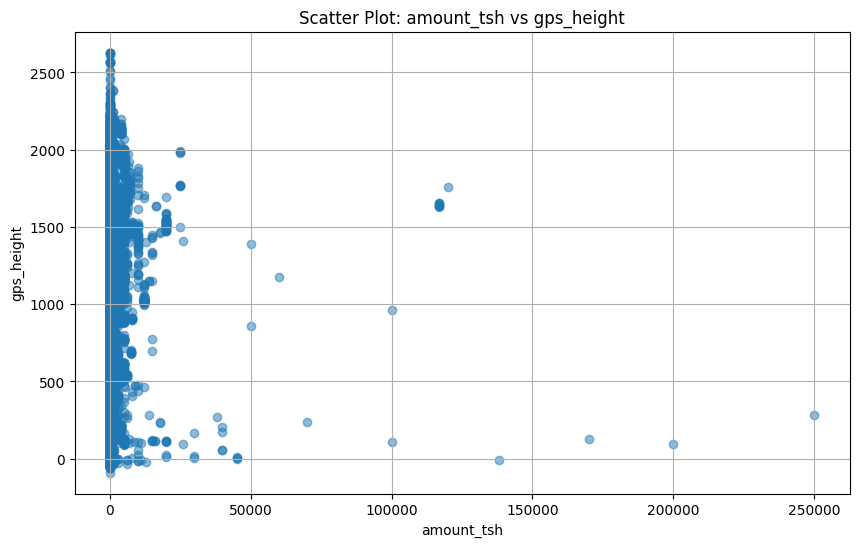

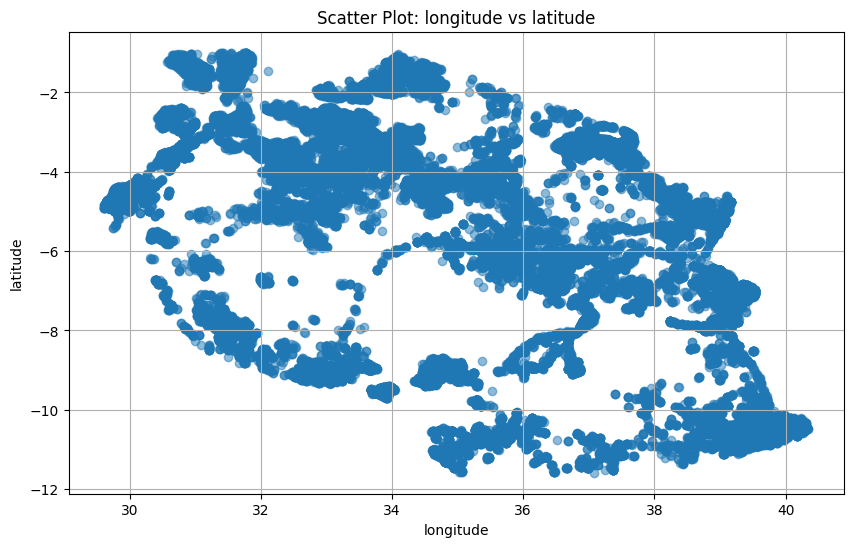

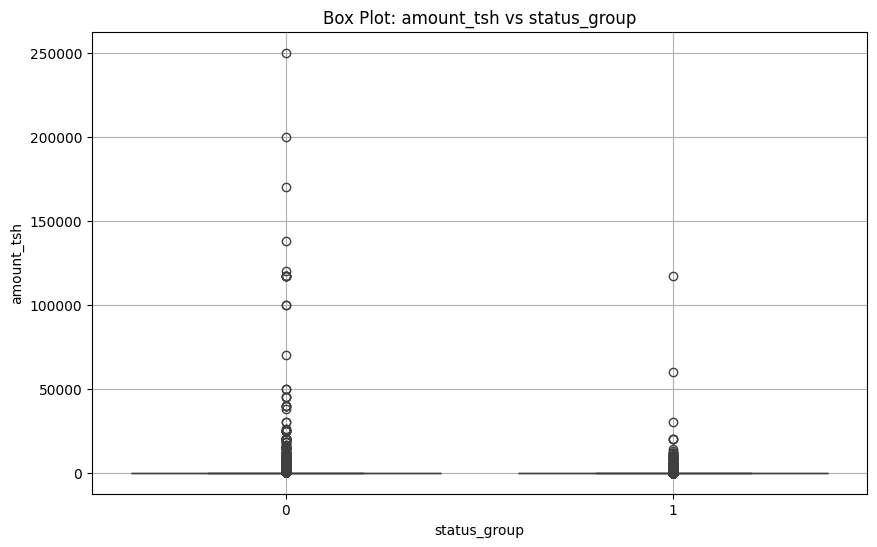

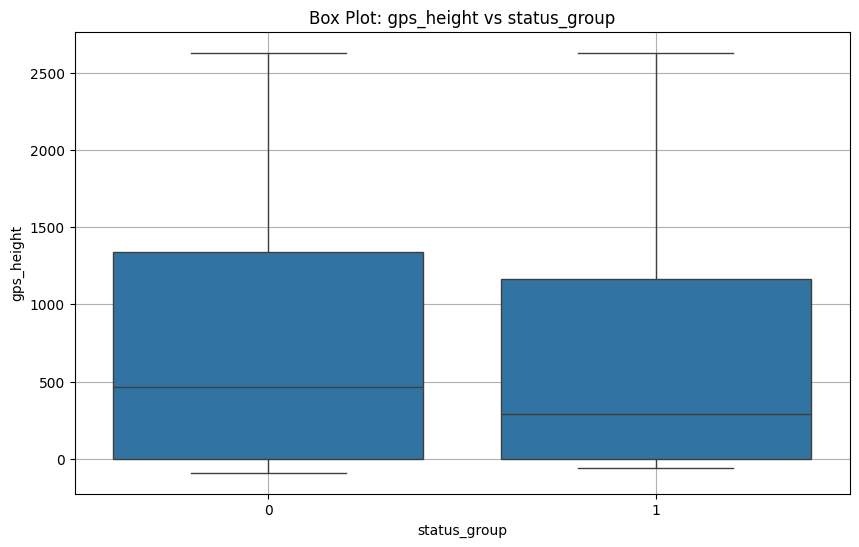

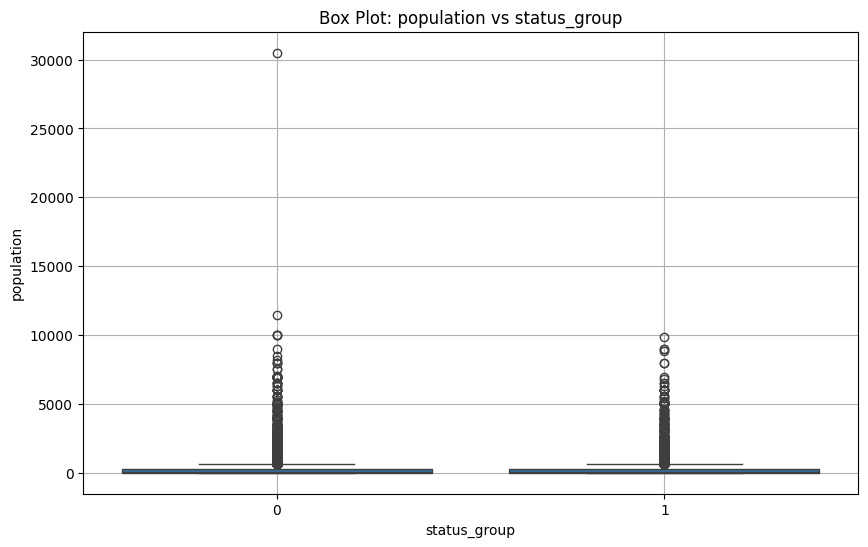

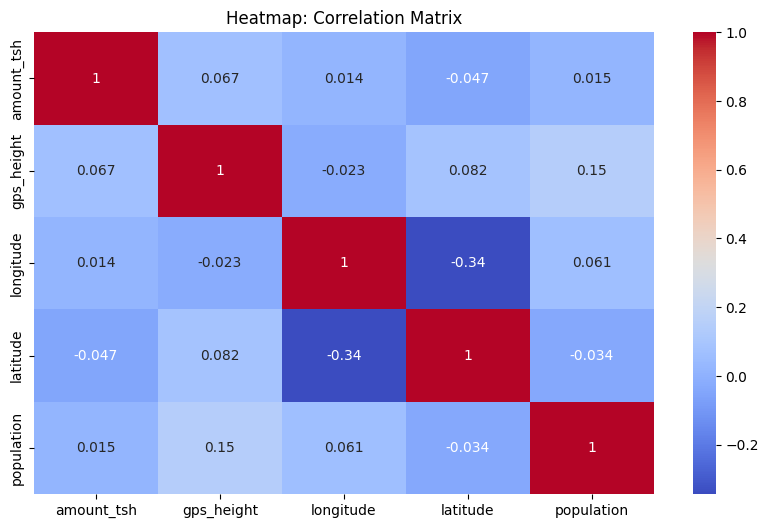

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'Reto_agua_final.csv'
data = pd.read_csv(file_path)


# Gráfico de dispersión para 'amount_tsh' vs 'gps_height'
plt.figure(figsize=(10, 6))
plt.scatter(data['amount_tsh'], data['gps_height'], alpha=0.5)
plt.title('Scatter Plot: amount_tsh vs gps_height')
plt.xlabel('amount_tsh')
plt.ylabel('gps_height')
plt.grid(True)
plt.show()

# Gráfico de dispersión para 'longitude' vs 'latitude'
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5)
plt.title('Scatter Plot: longitude vs latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.show()

# Diagrama de cajas para 'amount_tsh' vs 'status_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='amount_tsh', data=data)
plt.title('Box Plot: amount_tsh vs status_group')
plt.xlabel('status_group')
plt.ylabel('amount_tsh')
plt.grid(True)
plt.show()

# Diagrama de cajas para 'gps_height' vs 'status_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='gps_height', data=data)
plt.title('Box Plot: gps_height vs status_group')
plt.xlabel('status_group')
plt.ylabel('gps_height')
plt.grid(True)
plt.show()

# Diagrama de cajas para 'population' vs 'status_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='population', data=data)
plt.title('Box Plot: population vs status_group')
plt.xlabel('status_group')
plt.ylabel('population')
plt.grid(True)
plt.show()

# Mapa de calor para las correlaciones entre variables numéricas
numerical_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population']
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()




Después, haced un gráfico, el que consideréis adecuado, para detectar outliers en 
population y gps_height ¿alguno tiene outliers?


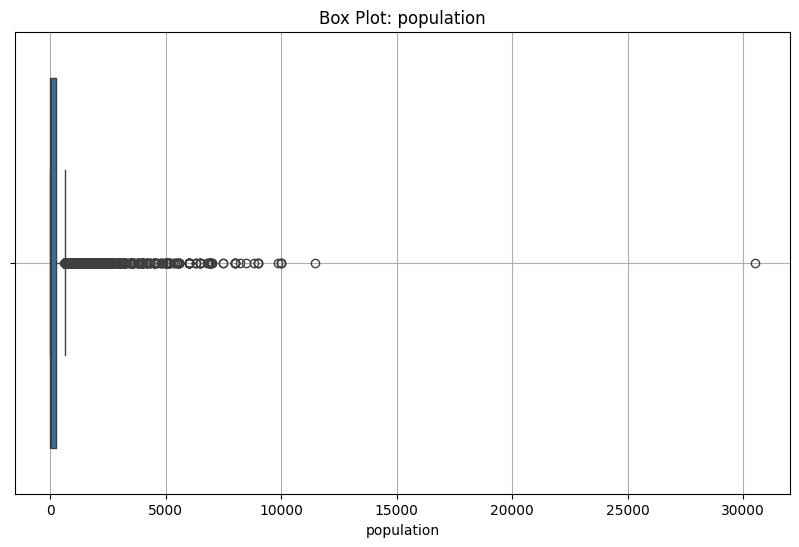

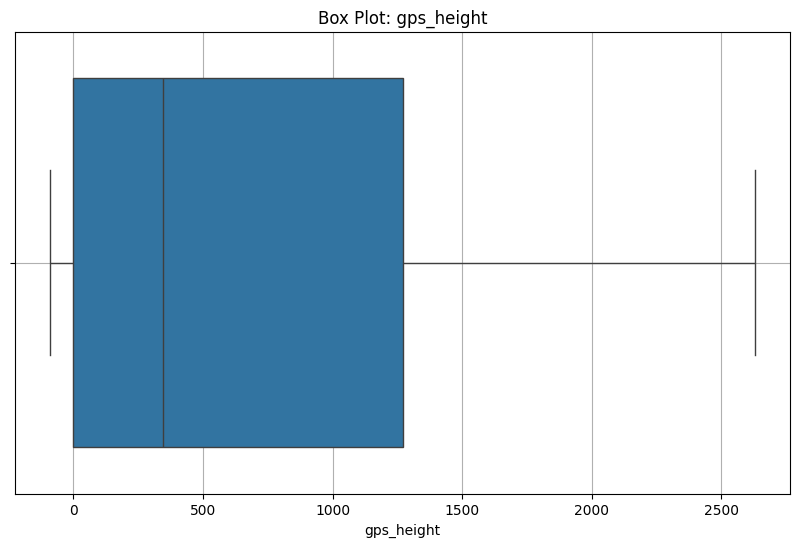

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Reto_agua_final.csv'
data = pd.read_csv(file_path)

# Diagrama de cajas para 'population'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['population'])
plt.title('Box Plot: population')
plt.xlabel('population')
plt.grid(True)
plt.show()

# Diagrama de cajas para 'gps_height'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['gps_height'])
plt.title('Box Plot: gps_height')
plt.xlabel('gps_height')
plt.grid(True)
plt.show()


Sí, el gráfico de caja para la columna population muestra claramente la presencia de outliers.


 De ser así, eliminadlos con el método de 
Inter cuartil con la columna o columnas con datos atípicos.


In [71]:
df.shape

(46969, 22)

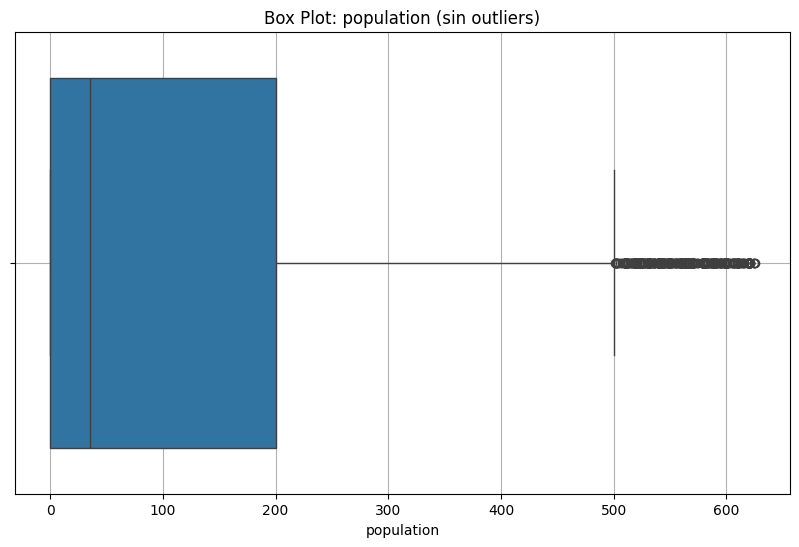

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'Reto_agua_final.csv'
data = pd.read_csv(file_path)

# Definir una función para eliminar outliers usando el método IQR para una columna específica
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers en la columna 'population'
df = remove_outliers_iqr(data, 'population')

# Diagrama de cajas para 'population' después de eliminar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['population'])
plt.title('Box Plot: population (sin outliers)')
plt.xlabel('population')
plt.grid(True)
plt.show()


In [73]:
df.shape

(44116, 22)

El gráfico generado muestra que aún existen algunos valores considerados como outliers en la columna population, sin embargo son valores muy proximos al limite superior y estan concentrados entre los 500 y 650 pobladores.


 ¿El modelo ha mejorado? 
Recordad que hay que volver a sacar los valores x e y (test y train). 

In [74]:
df.shape

(44116, 22)

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

X = data.drop(columns=['status_group'])
y = data['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_classification_rep = classification_report(y_test, y_test_pred)

# entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_classification_rep = classification_report(y_train, y_train_pred)

print("Testing Metrics:")
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print('Classification Report:')
print(test_classification_rep)

print("\nTraining Metrics:")
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print('Classification Report:')
print(train_classification_rep)


c:\Users\Ariel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Metrics:
Accuracy: 0.8987651692569726
Precision: 0.8992485299758671
Recall: 0.8987651692569726
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5325
           1       0.91      0.85      0.88      4069

    accuracy                           0.90      9394
   macro avg       0.90      0.89      0.90      9394
weighted avg       0.90      0.90      0.90      9394


Training Metrics:
Accuracy: 0.9335994677312043
Precision: 0.9342337584549814
Recall: 0.9335994677312043
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     21439
           1       0.95      0.89      0.92     16136

    accuracy                           0.93     37575
   macro avg       0.94      0.93      0.93     37575
weighted avg       0.93      0.93      0.93     37575



####  ¿El modelo ha mejorado?  

Entrenamiento:

Las métricas de entrenamiento son muy similares entre las nuevas y las anteriores. No hay una mejora significativa.

Prueba:

Las métricas de prueba también son muy similares entre las nuevas y las anteriores.
En general, no hay una mejora significativa entre las nuevas métricas y las anteriores. Ambas versiones del modelo muestran un rendimiento similar tanto en los conjuntos de entrenamiento como en los de prueba. Sin embargo, el nuevo modelo muestra un rendimiento ligeramente inferior en términos de precision y recall en el conjunto de prueba.

--------------------------------------------------------------------------------------

### Afinamos el modelo usando GridSearchCV

#### Afinando el modelo

El modelo XGBoost afinado muestra un excelente rendimiento tanto en el conjunto de entrenamiento como en el de prueba.
El modelo no parece tener problemas significativos de sobreajuste o infraajuste.
El alto ROC-AUC Score (0.9645) indica una excelente capacidad de discriminación entre las clases.

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test, "XGBoost (Tuned)")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Evaluating XGBoost (Tuned)
Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21439
           1       0.97      0.93      0.95     16136

    accuracy                           0.96     37575
   macro avg       0.96      0.95      0.96     37575
weighted avg       0.96      0.96      0.96     37575

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5325
           1       0.91      0.86      0.88      4069

    accuracy                           0.90      9394
   macro avg       0.90      0.90      0.90      9394
weighted avg       0.90      0.90      0.90      9394

ROC-AUC Score: 0.9645238878177724


#### Conclusión sobre el ajuste de Hyperparametros

#### Entrenamiento:

Las métricas de entrenamiento han mejorado significativamente con el ajuste de los hiperparámetros. La precisión, el recall y el f1-score han aumentado a 0.96, lo que indica que el modelo está ajustándose mejor a los datos de entrenamiento.

#### Prueba:

Las métricas de prueba se mantienen aproximadamente igual, con una precisión, recall y f1-score de 0.90. Sin embargo, el ROC-AUC Score ha mejorado ligeramente de 0.9627 a 0.9645.
El ajuste de hiperparámetros ha mejorado el rendimiento del modelo en los datos de entrenamiento, lo que sugiere que el modelo está mejor ajustado. Aunque las métricas en el conjunto de prueba no han mejorado significativamente, la ligera mejora en el ROC-AUC Score indica un mejor rendimiento general del modelo ajustado.